In [1]:
import seaborn as sns
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, ttest_1samp


In [6]:
datFile = '../out_2/skewsAll.out'
dat = pd.read_csv(datFile)

datFile_4UKB = '../../torque/out_2/skewsAll.out'
dat_4UKB = pd.read_csv(datFile_4UKB)


Index([u'SID', u'SkewsXY_x', u'SkewsXZ_x', u'SkewsXY_y', u'SkewsXZ_y'], dtype='object')


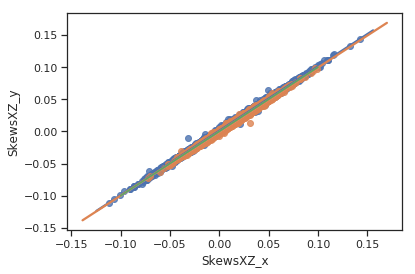

(0.9991505471648967, 0.0)
(0.9979312275340333, 0.0)


In [7]:
# correlations of skews with and without bias field correction
tmp_dat = dat_4UKB[['SID', 'SkewsXY','SkewsXZ']].merge(dat[['SID','SkewsXY','SkewsXZ']], left_on='SID',right_on='SID')
print tmp_dat.columns
sns.regplot(tmp_dat['SkewsXY_x'], tmp_dat['SkewsXY_y'])
sns.regplot(tmp_dat['SkewsXZ_x'], tmp_dat['SkewsXZ_y'])
plt.plot([-0.10,0.10],[-0.10, 0.10])
plt.show()
print pearsonr(tmp_dat['SkewsXY_x'], tmp_dat['SkewsXY_y'])
print pearsonr(tmp_dat['SkewsXZ_x'], tmp_dat['SkewsXZ_y'])


In [8]:
# descriptive statitsicts
print dat.columns
print dat.shape
print dat.describe()
print dat['SkewsXY'].min(), dat['SkewsXY'].max(), sum(dat['SkewsXY']>0)*1.0/dat['SkewsXY'].shape[0],ttest_1samp(dat['SkewsXY'],0)
print dat['SkewsXZ'].min(), dat['SkewsXZ'].max(), sum(dat['SkewsXZ']>0)*1.0/dat['SkewsXZ'].shape[0],ttest_1samp(dat['SkewsXZ'],0)

# Shapiro-Wilk Test, may suitable for smaller samples, e.g., thousands or fewer
#from scipy.stats import shapiro
#stat, p = shapiro(dat['SkewsXZ'])
#print stat, p


Index([u'SID', u'ScalesAvg', u'ScalesX', u'ScalesY', u'ScalesZ', u'SkewsXY',
       u'SkewsXZ', u'SkewsYZ'],
      dtype='object')
(39678, 8)
                SID     ScalesAvg       ScalesX       ScalesY       ScalesZ  \
count  3.967800e+04  39678.000000  39678.000000  39678.000000  39678.000000   
mean   3.521184e+06      1.114051      1.088845      1.078402      1.174907   
std    1.452454e+06      0.035935      0.042216      0.044990      0.050565   
min    1.000099e+06      0.961051      0.921209      0.906750      0.993827   
25%    2.267781e+06      1.088100      1.059374      1.047172      1.140189   
50%    3.531476e+06      1.113595      1.088564      1.077187      1.174880   
75%    4.779108e+06      1.139620      1.118185      1.107979      1.208988   
max    6.026180e+06      1.283590      1.278782      1.332685      1.393371   

            SkewsXY       SkewsXZ       SkewsYZ  
count  39678.000000  39678.000000  39678.000000  
mean       0.011021      0.010379     -0.06324

In [4]:
sns.set(style='ticks')

#cols = ['SkewsXY', u'SkewsXZ', u'SkewsYZ', 'ScalesAvg', 'ScalesX', 'ScalesY', 'ScalesZ']
cols = ['SkewsXY', u'SkewsXZ', 'ScalesAvg', 'ScalesX', 'ScalesY', 'ScalesZ']
#sns.pairplot(dat[cols])
#plt.show()

print 'XY - '
print pearsonr(dat['SkewsXY'], dat['SkewsXZ'])
print pearsonr(dat['SkewsXY'], dat['ScalesAvg'])
print pearsonr(dat['SkewsXY'], dat['ScalesX'])
print pearsonr(dat['SkewsXY'], dat['ScalesY'])
print pearsonr(dat['SkewsXY'], dat['ScalesZ'])
print 'XZ - Scales'
print pearsonr(dat['SkewsXZ'], dat['ScalesAvg'])
print pearsonr(dat['SkewsXZ'], dat['ScalesX'])
print pearsonr(dat['SkewsXZ'], dat['ScalesY'])
print pearsonr(dat['SkewsXZ'], dat['ScalesZ'])

corr = dat[cols].corr()
corr.style.background_gradient().set_precision(2)
#corr.style.background_gradient().set_properties(**{'font-size':'0pt'})

XY - 
(0.07409784692405365, 1.981798441128034e-49)
(-0.06924276655854499, 2.2542994862303655e-43)
(-0.06002028637107127, 5.351321718210491e-33)
(-0.04681388955349853, 1.060330818802734e-20)
(-0.05586563854746306, 8.341302388472213e-29)
XZ - Scales
(-0.02216398009599166, 1.0086011598726553e-05)
(-0.011246466451690189, 0.025076523484125562)
(-0.015335256580793188, 0.0022523703336476686)
(-0.02422102644604546, 1.3984615785240095e-06)


,SkewsXY,SkewsXZ,ScalesAvg,ScalesX,ScalesY,ScalesZ
SkewsXY,1,0.074,-0.069,-0.06,-0.047,-0.056
SkewsXZ,0.074,1,-0.022,-0.011,-0.015,-0.024
ScalesAvg,-0.069,-0.022,1,0.76,0.75,0.83
ScalesX,-0.06,-0.011,0.76,1,0.36,0.47
ScalesY,-0.047,-0.015,0.75,0.36,1,0.42
ScalesZ,-0.056,-0.024,0.83,0.47,0.42,1


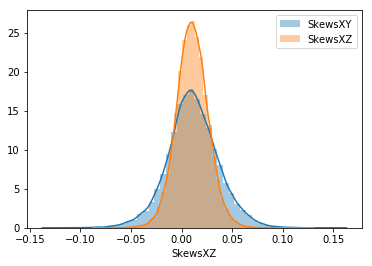

In [3]:
sns.distplot(dat['SkewsXY'])
sns.distplot(dat['SkewsXZ'])
#sns.distplot(dat['SkewsYZ'])
#plt.legend(['SkewsXY','SkewsXZ','SkewYZ'])
plt.legend(['SkewsXY','SkewsXZ'])

plt.show()

In [6]:
print '+', dat[dat['SkewsXY']>0.10]['SID']
print '-', dat[dat['SkewsXY']<-0.10]['SID']

print '+', dat[dat['SkewsXY']>np.percentile(dat['SkewsXY'],99.95)]['SID']
print '+', dat[dat['SkewsXY']<np.percentile(dat['SkewsXY'],0.05)]['SID']

print '0', dat[(dat['SkewsXY']<0.000005)&(dat['SkewsXY']>-0.000005)]['SID']


+ 149      3434385
858      5084865
1614     1916865
2148     5112342
2216     2391667
2423     1826729
3610     1741852
5715     5322450
5780     2083698
8101     5238105
8548     1336403
10082    2813517
10812    3916766
11246    1627016
11970    5458836
12675    1607402
13027    4061011
14345    1578403
15206    2183732
15605    3075402
17547    4408169
18088    5625214
18212    4272436
Name: SID, dtype: int64
- 3612     5103281
9167     3139385
10087    4172917
11150    5063328
15305    5092779
Name: SID, dtype: int64
+ 149      3434385
858      5084865
2148     5112342
2423     1826729
3610     1741852
5715     5322450
8101     5238105
11970    5458836
12675    1607402
13027    4061011
18212    4272436
Name: SID, dtype: int64
+ 2774     1572989
3612     5103281
4963     2367922
5727     6003590
6970     1643959
9167     3139385
10087    4172917
11150    5063328
12560    2144660
15305    5092779
17837    3180412
Name: SID, dtype: int64
0 891      4679865
3665     5383175
4060     2

In [7]:
print '+', dat[dat['SkewsXZ']>0.10]['SID']
print '-', dat[dat['SkewsXZ']<-0.10]['SID']

print '+', dat[dat['SkewsXZ']>np.percentile(dat['SkewsXZ'],99.95)]['SID']
print '+', dat[dat['SkewsXZ']<np.percentile(dat['SkewsXZ'],0.05)]['SID']

print '0', dat[(dat['SkewsXZ']<0.000005)&(dat['SkewsXZ']>-0.000005)]['SID']


+ Series([], Name: SID, dtype: int64)
- Series([], Name: SID, dtype: int64)
+ 225      5569985
2063     4271646
4967     1258329
5150     5411938
8134     3747971
10237    3752250
10291    4520072
15879    3911719
17538    4057238
19071    5156491
19324    5545567
Name: SID, dtype: int64
+ 1566     2352007
3463     3456154
4098     2977476
4320     4345492
5151     5295966
7599     3312726
7862     1566382
13076    5030236
15004    4178250
15915    5183637
18651    5973915
Name: SID, dtype: int64
0 2218     3045993
4737     2342261
6224     2291619
6475     4809442
6860     1703485
7035     5613128
7334     3533838
7390     1987294
11899    2436748
12183    2142449
16031    1633231
16306    4612047
17181    2635316
17392    2800472
18823    1305756
19509    5259645
20371    5035286
Name: SID, dtype: int64


In [16]:
print 'SkewsXY -----------------'
print '-\n', dat[dat['SkewsXY']<np.percentile(dat['SkewsXY'],0.05)]['SID']
print '-0.05\n', dat[(dat['SkewsXY']>-0.0502)&(dat['SkewsXY']<-0.0498)]['SID']
print '0\n', dat[(dat['SkewsXY']<0.000001)&(dat['SkewsXY']>-0.000001)]['SID']
print '0.05\n', dat[(dat['SkewsXY']<0.0501)&(dat['SkewsXY']>0.0499)]['SID']
print '+\n', dat[dat['SkewsXY']>np.percentile(dat['SkewsXY'],99.95)]['SID']

print 'SkewsXZ -----------------'
print '-\n', dat[dat['SkewsXZ']<np.percentile(dat['SkewsXZ'],0.01)]['SID']
print '-0.03\n', dat[(dat['SkewsXZ']>-0.0302)&(dat['SkewsXZ']<-0.0298)]['SID']
print '0\n', dat[(dat['SkewsXZ']<0.000001)&(dat['SkewsXZ']>-0.000001)]['SID']
print '0.03\n', dat[(dat['SkewsXZ']<0.0301)&(dat['SkewsXZ']>0.0299)]['SID']
print '+\n', dat[dat['SkewsXZ']>np.percentile(dat['SkewsXZ'],99.995)]['SID']

#dat[['SID','SkewsXY']]

SkewsXY -----------------
-
2774     1572989
3612     5103281
4963     2367922
5727     6003590
6970     1643959
9167     3139385
10087    4172917
11150    5063328
12560    2144660
15305    5092779
17837    3180412
Name: SID, dtype: int64
-0.05
1369     1656823
2703     1116464
3480     1953988
4369     2426570
10103    4042602
12292    2943881
17997    5854749
18739    2024321
20046    3901255
Name: SID, dtype: int64
0
3665     5383175
4060     2353513
4079     4194092
6244     5969006
6437     5255630
6958     1650137
7119     3386124
7513     2143193
9107     2849671
10051    3117944
10233    5651483
10692    5530605
10708    5320363
11566    1199863
12566    3877133
13613    5317541
14365    5133175
15131    4596088
15292    5480774
18524    3084875
18898    4014240
19282    3714507
21213    2989820
Name: SID, dtype: int64
0.05
1666     1235161
1981     4671650
3564     3056969
6502     4950970
6733     4836014
7663     3009316
10774    4381594
11575    3334853
11946    4867708
124

In [3]:
dat['SID', 'SkewsXY'].to_csv('../doc/dat_horizontal_skew.csv', index=False)


KeyError: ('SID', 'SkewsXY')

In [9]:
#print '+', dat[dat['SkewsXZ']>0.10]['SID']
#print '-', dat[dat['SkewsXZ']<-0.10]['SID']

print '+', dat[dat['SkewsXZ']>np.percentile(dat['SkewsXZ'],99.95)]['SID']
print '-', dat[dat['SkewsXZ']<np.percentile(dat['SkewsXZ'],0.05)]['SID']

print '0', dat[(dat['SkewsXZ']<0.000005)&(dat['SkewsXZ']>-0.000005)]['SID']

+ 225      5569985
2063     4271646
4967     1258329
5150     5411938
8134     3747971
10237    3752250
10291    4520072
15879    3911719
17538    4057238
19071    5156491
19324    5545567
Name: SID, dtype: int64
- 1566     2352007
3463     3456154
4098     2977476
4320     4345492
5151     5295966
7599     3312726
7862     1566382
13076    5030236
15004    4178250
15915    5183637
18651    5973915
Name: SID, dtype: int64
0 2218     3045993
4737     2342261
6224     2291619
6475     4809442
6860     1703485
7035     5613128
7334     3533838
7390     1987294
11899    2436748
12183    2142449
16031    1633231
16306    4612047
17181    2635316
17392    2800472
18823    1305756
19509    5259645
20371    5035286
Name: SID, dtype: int64
